<a href="https://colab.research.google.com/github/BachVy/TRI-TUE-NHAN-TAO/blob/main/BaoCao_TTNT_Tuan04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÔ TẢ BÀI TOÁN TÔ MÀU ĐỒ THỊ
## 1. Khái niệm chung

Bài toán tô màu đồ thị (Graph Coloring Problem) là bài toán gán một màu cho từng đỉnh của một đồ thị sao cho không có hai đỉnh kề nhau mang cùng một màu.

Đây là một trong những bài toán quan trọng trong lý thuyết đồ thị và có nhiều ứng dụng trong thực tế.

## 2. Mô tả bài toán
Cho 1 đồ thị vô hướng G = (V,E) gồm:

- V: tập các đỉnh của đồ thị

- E: tập các cạnh nối giữa các đỉnh

và một tập màu cho trước.

**Yêu cầu:**
- Hãy gán một màu cho mỗi đỉnh của đồ thị sao cho:

- Hai đỉnh kề nhau (tức là có cạnh nối trực tiếp) không được trùng màu.

- Sử dụng ít màu nhất có thể hoặc tập màu cho trước.

- In ra màu tương ứng của từng đỉnh sau khi hoàn thành.

## 3. Dữ liệu đầu vào

- Đồ thị biểu diễn bằng ma trận kề hoặc danh sách cạnh.

- Một danh sách các màu có sẵn để sử dụng.

Ví dụ ma trận kề:

0 1 1 0

1 0 1 0

1 1 0 1

0 0 1 0
##4. Dữ liệu đầu ra
Tên đỉnh và màu được gán cho từng đỉnh, ví dụ:

A = Blue

B = Red

C = Yellow

D = Blue

## 5. Mục tiêu của bài toán

- Đảm bảo không có hai đỉnh kề nhau có cùng màu.

- Giảm thiểu số lượng màu được sử dụng (nếu yêu cầu).

- Tô màu hiệu quả dựa trên thứ tự bậc của đỉnh hoặc thuật toán tham lam (Greedy).

## 6. Ý nghĩa thực tiễn

Bài toán tô màu đồ thị được ứng dụng vào rất nhiều lĩnh vực như:

- Phân chia tần số trong mạng di động

- Lập lịch thi, để các môn có sinh viên trùng không thi cùng giờ

- Tối ưu hóa tài nguyên

- Gán màu bản đồ (4-color theorem)

# Bài 1: Đọc file ma trận kề và tô màu đồ thị
## Mô tả bài toán:
Cho một đồ thị vô hướng được biểu diễn dưới dạng ma trận kề lưu trong một file .txt. Hãy:
- Đọc ma trận kề từ file để khôi phục lại cấu trúc đồ thị.
- Thực hiện tô màu các đỉnh của đồ thị sao cho:
- Hai đỉnh kề nhau không được mang cùng một màu.
- Số lượng màu cố định (ví dụ: Blue, Red, Yellow, Green).
- In kết quả màu của từng đỉnh ra màn hình.

## Đầu vào:

Một file .txt chứa ma trận kề (n dòng, mỗi dòng n số).

## Đầu ra:

Danh sách các đỉnh và màu của mỗi đỉnh sau khi tô.

In [67]:
import networkx as nx
import matplotlib.pyplot as plt

In [68]:
# Hàm đọc ma trận kề từ file
def readAdjMatrix(filename):
    G = []
    with open(filename, "r") as f:
        for line in f:
            row = list(map(int, line.strip().split()))
            G.append(row)
    return G

In [69]:
# Thuật toán tô màu đồ thị
def colorGraph(G):
    n = len(G)
    node = "".join(chr(ord('A') + i) for i in range(n))

    # Ánh xạ tên đỉnh
    t_ = {node[i]: i for i in range(n)}

    # Tính bậc đỉnh
    degree = [sum(G[i]) for i in range(n)]

    # Màu có thể sử dụng
    colorDict = {node[i]: ["Blue", "Red", "Yellow", "Green"] for i in range(n)}

    # Sắp xếp đỉnh theo bậc giảm dần
    sortedNode = []
    used = set()
    for _ in range(n):
        max_deg = -1
        idx = -1
        for j in range(n):
            if j not in used and degree[j] > max_deg:
                max_deg = degree[j]
                idx = j
        used.add(idx)
        sortedNode.append(node[idx])

    # Tô màu
    theSolution = {}
    for v in sortedNode:
        available = colorDict[v]
        chosenColor = available[0]
        theSolution[v] = chosenColor

        # Loại màu khỏi lân cận
        adj = G[t_[v]]
        for j in range(n):
            if adj[j] == 1 and chosenColor in colorDict[node[j]]:
                colorDict[node[j]].remove(chosenColor)

    return theSolution

1. Xác định số lượng đỉnh
2. Tạo danh sách tên các đỉnh
3. Tạo ánh xạ tên đỉnh → chỉ số
4. Tính bậc của từng đỉnh
5. Khởi tạo các màu có thể dùng
6. Sắp xếp đỉnh theo thứ tự bậc giảm dần
7. Tô màu theo thứ tự đã sắp xếp
- Chọn màu
- Loại bỏ màu khỏi các đỉnh kề
8. Trả về kết quả

In [70]:
filename = "matrix.txt"    # Nhập tên file ở đây
G = readAdjMatrix(filename)

result = colorGraph(G)

# In kết quả
print("KẾT QUẢ TÔ MÀU ĐỒ THỊ:\n")
for node, color in sorted(result.items()):
    print(f"Đỉnh {node} = {color}")


KẾT QUẢ TÔ MÀU ĐỒ THỊ:

Đỉnh A = Yellow
Đỉnh B = Blue
Đỉnh C = Red
Đỉnh D = Yellow
Đỉnh E = Blue
Đỉnh F = Red


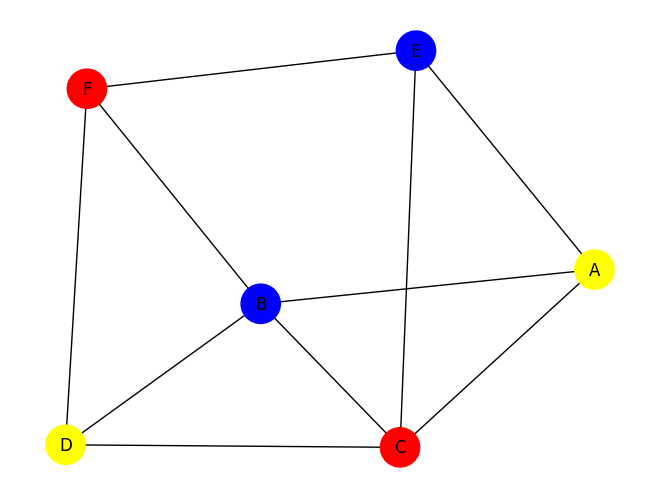

In [71]:
# Vẽ đồ thị
def drawGraphColored(G, solution):
    n = len(G)
    # Tạo tên đỉnh tự động giống hàm colorGraph
    node = "".join(chr(ord('A') + i) for i in range(n))

    # Tạo đồ thị NetworkX
    graph = nx.Graph()
    graph.add_nodes_from(node)

    # Thêm các cạnh từ ma trận kề
    for i in range(n):
        for j in range(i+1, n):
            if G[i][j] == 1:
                graph.add_edge(node[i], node[j])

    # Chuẩn bị màu cho từng đỉnh
    color_list = [solution[v] for v in node]

    # Vẽ đồ thị
    pos = nx.spring_layout(graph, seed=42)  # bố trí các đỉnh
    nx.draw(graph, pos, with_labels=True, node_color=color_list, node_size=800, font_size=12)
    plt.show()

drawGraphColored(G, result)


# Bài 2: Phát triển chương trình thành các chương trình con
## Mô tả bài toán:

Chương trình cần có các chức năng:
- Đọc ma trận kề từ file.
- Tính bậc đỉnh, sắp xếp đỉnh theo bậc.
- Tô màu đồ thị theo thuật toán tham lam.
- In kết quả ra màn hình.
- Áp dụng hàm main() để điều khiển toàn bộ.
## Mục tiêu chính:
- Tăng tính tái sử dụng,
- Tăng dễ bảo trì và nâng cao chất lượng lập trình thông qua phân rã chương trình.
## Đầu vào:
File ma trận kề .txt.
## Đầu ra:
Màu của từng đỉnh.

In [81]:
# 1. Hàm đọc file ma trận kề
def readAdjMatrix(filename):
    G = []
    with open(filename, "r") as f:
        for line in f:
            row = list(map(int, line.strip().split()))
            G.append(row)
    return G

In [82]:
# 2. Hàm khởi tạo tên đỉnh
def initNodeNames(n):
    # Using V0, V1, V2... for node names to avoid issues with character encoding for large n
    return [f"V{i}" for i in range(n)]

In [83]:
# 3. Hàm tính bậc của các đỉnh
def getDegree(G):
    return [sum(row) for row in G]

In [84]:
# 4. Hàm sắp xếp đỉnh theo bậc giảm dần
def sortByDegree(node, degree):
    n = len(degree)
    used = set()
    sortedNode = []

    for _ in range(n):
        max_deg = -1
        idx = -1
        for i in range(n):
            if i not in used and degree[i] > max_deg:
                max_deg = degree[i]
                idx = i
        used.add(idx)
        sortedNode.append(node[idx])
    return sortedNode

1. Xác định số lượng đỉnh
- Lấy số phần tử của danh sách degree.
2. Khởi tạo tập đỉnh đã chọn
- Tạo một tập used = set() để lưu các đỉnh đã được đưa vào danh sách sắp xếp.
- Ban đầu tập này rỗng.
3. Khởi tạo danh sách kết quả
- Tạo danh sách rỗng sortedNode = [] để lưu thứ tự đỉnh sau khi sắp xếp.
4. Lặp để chọn đủ n đỉnh
- Đặt giá trị khởi tạo
- Tìm đỉnh có bậc lớn nhất chưa được chọn
- Đánh dấu đỉnh được chọn
- Lưu đỉnh vào danh sách kết quả
5. Trả về danh sách đã sắp xếp

In [85]:
# 5. Hàm chuẩn bị bảng màu ban đầu
def initColorDict(node):
    return {v: ["Blue", "Red", "Yellow", "Green"] for v in node}

In [86]:
# 6. Hàm ánh xạ tên đỉnh sang chỉ số
def indexMap(node):
    return {node[i]: i for i in range(len(node))}

In [87]:
# 7. Hàm tô màu đồ thị
def colorGraph(G, node):
    n = len(G)
    t_ = indexMap(node)
    degree = getDegree(G)
    sortedNode = sortByDegree(node, degree)
    colorDict = initColorDict(node)

    solution = {}

    for v in sortedNode:
        chosen = colorDict[v][0]
        solution[v] = chosen

        # Loại màu khỏi hàng xóm
        adj = G[t_[v]]
        for j in range(n):
            if adj[j] == 1 and chosen in colorDict[node[j]]:
                colorDict[node[j]].remove(chosen)

    return solution

1. Lấy số lượng đỉnh của đồ thị
2. Tạo ánh xạ tên đỉnh → vị trí trong ma trận
3. Tính bậc của các đỉnh
4. Sắp xếp đỉnh theo bậc giảm dần
5. Khởi tạo danh sách màu khả dụng
6. Tô màu cho từng đỉnh theo thứ tự đã sắp xếp
7. Loại bỏ màu đã chọn khỏi các đỉnh kề
8. Trả về kết quả

In [88]:
# 8. Hàm in kết quả
def printColorResult(solution):
    print("\nKẾT QUẢ TÔ MÀU ĐỒ THỊ:\n")
    for v, c in sorted(solution.items()):
        print(f"Đỉnh {v} = {c}")

In [89]:
def main():
    filename = "matrix.txt"
    G = readAdjMatrix(filename)

    node = initNodeNames(len(G))

    solution = colorGraph(G, node)
    printColorResult(solution)


# Gọi chạy chương trình
main()



KẾT QUẢ TÔ MÀU ĐỒ THỊ:

Đỉnh V0 = Yellow
Đỉnh V1 = Blue
Đỉnh V2 = Red
Đỉnh V3 = Yellow
Đỉnh V4 = Blue
Đỉnh V5 = Red


# Bài toán: Tô màu đồ thị từ file ma trận ngẫu nhiên
## Mục tiêu bài toán

Cho phép người dùng:
- Nhập số đỉnh n của đồ thị.
- Tạo ma trận kề ngẫu nhiên với n đỉnh và lưu vào file .txt.
- Đọc ma trận từ file.
- Áp dụng thuật toán tô màu đồ thị để gán màu cho từng đỉnh.
## Yêu cầu:
- Không có hai đỉnh kề nhau cùng màu.
- Sử dụng danh sách màu cố định: Blue, Red, Yellow, Green.
- In ra kết quả: đỉnh → màu.
## Dữ liệu đầu vào
- Số đỉnh n do người dùng nhập.
- Xác suất tạo cạnh giữa hai đỉnh (mặc định 0.4).
- File .txt chứa ma trận kề
## Dữ liệu đầu ra
- Từ điển ánh xạ đỉnh → màu, ví dụ:
Đỉnh A = Blue

Đỉnh B = Red

Đỉnh C = Blue

Đỉnh D = Red

Đỉnh E = Blue
- Đảm bảo không có hai đỉnh kề nhau trùng màu.
## Ý nghĩa bài toán
- Mô phỏng việc tô màu đồ thị cho đồ thị bất kỳ.
- Kiểm tra thuật toán Greedy Coloring.
## Các bước giải quyết bài toán
1. Người dùng nhập số đỉnh n.
2. tạo ma trận kề ngẫu nhiên.
3. Lưu ma trận vào file .txt.
4. Đọc ma trận từ file.
5. Tạo danh sách tên đỉnh (A, B, C…).
6. Khởi tạo danh sách màu khả dụng cho từng đỉnh.
7. Tính bậc của từng đỉnh.
8. Sắp xếp đỉnh theo bậc giảm dần (đỉnh bậc cao tô trước).
9. Tô màu đỉnh theo thuật toán tham lam:
- Gán màu đầu tiên còn khả dụng.
- Loại bỏ màu đó khỏi các đỉnh kề.
- In kết quả tô màu ra màn hình.

In [107]:
import random
import networkx as nx
import matplotlib.pyplot as plt

In [108]:
# Tạo ma trận kề ngẫu nhiên cho đồ thị vô hướng
def generateRandomGraph(n, edge_prob=0.4):
    G = [[0]*n for _ in range(n)]
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < edge_prob:
                G[i][j] = 1
                G[j][i] = 1
    return G

1. Tạo ma trận n × n toàn số 0.
2. Duyệt tất cả cặp đỉnh (i, j) với i < j.
3. Với mỗi cặp, sinh ngẫu nhiên để quyết định có tạo cạnh hay không dựa trên edge_prob.
4. Nếu có cạnh, cập nhật G[i][j] = 1 và G[j][i] = 1.
5. Trả về ma trận kề cuối cùng.

In [109]:
#Lưu ma trận kề vào file
def saveGraphToFile(G, filename="graph.txt"):
    with open(filename, "w") as f:
        for row in G:
            line = " ".join(str(x) for x in row)
            f.write(line + "\n")
    print(f"Đã lưu ma trận kề vào file '{filename}'")

1. Mở file để ghi dữ liệu.
2. Duyệt từng hàng của ma trận G.
3. Chuyển từng hàng thành chuỗi cách nhau bằng dấu cách.
4. Ghi chuỗi vào file, mỗi hàng trên một dòng.
5. Thông báo đã lưu xong.

In [114]:
# Chương trình tạo file
def main_generate():
    n = int(input("Nhập số đỉnh: "))
    G = generateRandomGraph(n)
    saveGraphToFile(G)

main_generate()

Nhập số đỉnh: 10
Đã lưu ma trận kề vào file 'graph.txt'


In [115]:
# Đọc ma trận kề từ file
def readGraphFromFile(filename="graph.txt"):
    with open(filename, "r") as f:
        lines = f.readlines()
    G = []
    for line in lines:
        row = [int(x) for x in line.strip().split()]
        G.append(row)
    return G

1. Mở file để đọc.
2. Đọc tất cả các dòng và lưu vào danh sách lines.
3. Tạo danh sách rỗng G.
4. Duyệt từng dòng:
- Loại bỏ khoảng trắng và ký tự xuống dòng.
- Tách giá trị theo dấu cách.
- Chuyển thành số nguyên.
- Thêm vào G.
5. Trả về ma trận G.

In [116]:
def initColorDict(node):
    all_colors = [
        "Blue", "Red", "Yellow", "Green", "Purple", "Orange", "Pink",
        "Brown", "Cyan", "Magenta", "Teal", "Lime", "Indigo", "Violet",
        "Gold", "Silver", "Maroon", "Navy", "Olive", "Coral"
    ]
    return {v: list(all_colors) for v in node}

def main_color():
    G = readGraphFromFile("graph.txt")
    n = len(G)
    node = "".join(chr(ord('A') + i) for i in range(n))

    # Dùng thuật toán tô màu đã có
    solution = colorGraph(G, node)

    # In kết quả
    print("Kết quả tô màu:")
    for v in sorted(solution.keys()):
        print(f"Đỉnh {v} = {solution[v]}")

main_color()

Kết quả tô màu:
Đỉnh A = Red
Đỉnh B = Green
Đỉnh C = Yellow
Đỉnh D = Red
Đỉnh E = Green
Đỉnh F = Green
Đỉnh G = Red
Đỉnh H = Blue
Đỉnh I = Yellow
Đỉnh J = Yellow


1. Đọc ma trận kề từ file "graph.txt".
2. Tạo danh sách tên đỉnh "A", "B"
3. Khởi tạo danh sách màu khả dụng cho từng đỉnh.
4. Áp dụng thuật toán tô màu tham lam (colorGraph).
5. In kết quả đỉnh → màu ra màn hình.

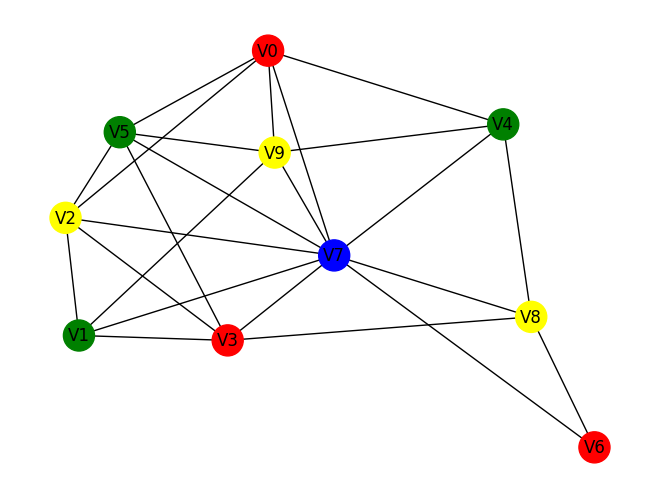

In [117]:
# Vẽ đồ thị dựa trên ma trận kề G và màu đã tô cho từng đỉnh.
def drawColoredGraph(G, node, solution):
    n = len(G)
    # Tạo đồ thị NetworkX
    graph = nx.Graph()

    # Thêm các đỉnh
    graph.add_nodes_from(node)

    # Thêm các cạnh
    for i in range(n):
        for j in range(i+1, n):
            if G[i][j] == 1:
                graph.add_edge(node[i], node[j])

    # Chuẩn bị màu cho từng đỉnh
    color_list = [solution[v] for v in node]

    # Vẽ đồ thị
    pos = nx.spring_layout(graph, seed=42)  # Vị trí các đỉnh
    nx.draw(graph, pos, with_labels=True, node_color=color_list, node_size=500, font_size=12)
    plt.show()

# Đọc lại ma trận kề từ file để đảm bảo G, node và solution được định nghĩa trong phạm vi này
G_draw = readGraphFromFile("graph.txt")
n_draw = len(G_draw)
node_draw = initNodeNames(n_draw)
solution_draw = colorGraph(G_draw, node_draw)

drawColoredGraph(G_draw, node_draw, solution_draw)

1. Khởi tạo đồ thị NetworkX
2. Thêm các đỉnh từ danh sách node vào đồ thị.
3. Thêm các cạnh
- Nếu G[i][j] == 1, thêm cạnh giữa đỉnh i và j.
- Chỉ xét j > i để tránh thêm cạnh hai lần vì đồ thị là vô hướng.
4. Chuẩn bị màu cho từng đỉnh
- Lấy màu từ solution cho từng đỉnh theo thứ tự trong node.
5. Xác định vị trí đỉnh
- Tự động bố trí các đỉnh trên mặt phẳng 2D.
- seed=42 đảm bảo vị trí cố định, không thay đổi sau mỗi lần vẽ.
6. Vẽ đồ thị
- with_labels=True: hiển thị tên đỉnh.
- node_color=color_list: gán màu từng đỉnh.
- node_size=500: kích thước nút.
- font_size=12: kích thước chữ.